# Linear Regression Technique alongside its Python Libraries for Data Analysis

### Aim:
The aim of this project is to investigate and evaluate statisical technique called Linear Regression alongside its Python Libraries (Scikit-Learn and Statmodels) for data analysis,focusing on their suitability for handling diverse data type and exploring their potential applications in the field of data science.

### Description:
This project utilizes a synthetic data constructed to act as an analogy to real-world application in house-price prediction. It has 500 samples and thereby includes the numerical and categorical variables within. The features in this synthetic dataset include:

 1. Numerical Features: a. House square footage b. Number of bedrooms c. House-age d. Distance to town centre (in km) e. Crime rate per 1,000 people.
 
 2. Categorial Features: a. Location (urban, suburban, and rural) b. Building type (apartment, townhouse, and detached).
 
 3. Target Variable: a. Price of the house (dependent variable) Various preprocessing methods were therefore applied to the dataset to verify its adequacy for regression modelling. First, missing values in the dataset were checked and imputation techniques were applied wherever appropriate. Next, categorical variables were changed into numerical format using one-hot encoding, which enabled an efficient model interpretation of categorical data. Furthermore, all numerical variables were subjected to different feature scaling methods to standardize their ranges in order to boost the performance of the model. Finally, the dataset was then split into 80% (training data) and 20% (testing data) so that a well-rounded evaluation of the model on unseen data would be possible.

# 1.Data Creation
As said in the description, this data creation process uses Python libraries (NumPy and pandas) to generate a synthetic dataset that simulates the characteristics of a realistic housing market for machine learning analysis.

Firstly, numerical features representing house attributes—such as square footage, number of bedrooms, house age, distance from the city center, and local crime rate—are generated using random sampling within specified realistic ranges. For instance, house sizes are uniformly distributed between 800 and 5,000 square feet, while crime rates vary from 0 to 50 incidents per 1,000 residents.

Secondly, categorical features including 'Location' (Urban, Suburban, Rural) and 'Building_Type' (Apartment, Townhouse, Detached) are randomly assigned to entries, simulating diverse housing conditions.

The target variable, house price, is then computed as a function of these numerical and categorical features. Specifically, a formula integrates multiple weighted factors: price increases with larger square footage, more bedrooms, and newer age, while price decreases with greater distance to the city center and higher crime rates. These base calculations are further adjusted by multipliers reflecting the premium or discount associated with specific locations and building types (e.g., urban properties or detached houses carry higher coefficients). To reflect natural variability and unpredictability inherent in real housing markets, Gaussian noise with zero mean and specified variance is added to the calculated prices.

Finally, the generated data for all features and the computed prices are consolidated into a pandas DataFrame, producing a tabular dataset suitable for subsequent statistical analysis and machine learning model development.

This synthetic data generation approach enables controlled experimentation and modeling when access to real housing data is limited or when testing methodologies under varied hypothetical scenarios.

In [17]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 500

# Numerical Features
square_feet = np.random.randint(800, 5000, num_samples)  # House size
bedrooms = np.random.randint(1, 6, num_samples)  # Number of bedrooms
age = np.random.randint(1, 100, num_samples)  # Age of house
distance_to_city = np.random.uniform(1, 50, num_samples)  # Distance to city center (km)
crime_rate = np.random.uniform(0, 50, num_samples)  # Crime rate per 1000 residents

# Categorical Features
locations = ['Urban', 'Suburban', 'Rural']
building_types = ['Apartment', 'Townhouse', 'Detached']
location = np.random.choice(locations, num_samples)
building_type = np.random.choice(building_types, num_samples)

# Assign price based on features (using a formula for realism)
location_multiplier = {'Urban': 1.8, 'Suburban': 1.3, 'Rural': 0.9}
building_multiplier = {'Apartment': 1.2, 'Townhouse': 1.5, 'Detached': 1.8}

price = (
    (square_feet * 150) + (bedrooms * 12000) + ((100 - age) * 500) -
    (distance_to_city * 2000) - (crime_rate * 1000)
) * np.array([location_multiplier[loc] for loc in location]) * np.array([building_multiplier[b] for b in building_type])

# Add some noise
price += np.random.normal(0, 60000, num_samples)

# Create DataFrame
df = pd.DataFrame({
    'Square_Feet': square_feet,
    'Bedrooms': bedrooms,
    'Age': age,
    'Distance_to_City_Center': distance_to_city,
    'Crime_Rate': crime_rate,
    'Location': location,
    'Building_Type': building_type,
    'Price': price
})

# Save to CSV
df.to_csv(r'C:\Users\USER\Sta_maz\data\house_prices_complete.csv', index=False)

# Show sample data
print(df.head(10))

   Square_Feet  Bedrooms  Age  Distance_to_City_Center  Crime_Rate  Location  \
0         1660         1   96                14.407707   30.979398     Rural   
1         4572         3   88                49.859101   32.510055  Suburban   
2         3892         4   78                21.882884    7.601243     Rural   
3         1266         2   32                23.117964    3.067481     Rural   
4         4244         4   46                 9.017567   39.038079  Suburban   
5         3971         4   16                39.945668   22.990021     Rural   
6         3719         5   68                34.990429    2.908190     Urban   
7          930         2   37                11.817711   49.743316     Urban   
8         2485         4   54                 5.036671    2.889028     Rural   
9         1569         4   85                34.344466   34.751761  Suburban   

  Building_Type         Price  
0     Apartment  1.978081e+05  
1     Apartment  7.208061e+05  
2     Apartment  6.6328

# 2.Exploratory Data Analysis (EDA) and Data Preprocessing
Exploratory Data Analysis (EDA) is the mathematical way of analyzing, investigating, and summarizing the main characteristics of the synthentic dataset created. It often involves a combination of statistical methods and data visualization techniques to provide insights into the structure, distribution, and relationships within the data before applying formal modeling or hypothesis testing. EDA helps detect patterns, anomalies, and missing values, enabling practitioners to refine data quality and select appropriate analytical methods.

### Before we proceed, we need to:
#### ✅ Load the dataset
#### ✅ Explore the data with summary statistics
#### ✅ Visualize relationships between features and price
#### ✅ Data Preparation: Handle categorical variables (convert them into a numerical format)

In [4]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\USER\Sta_maz\data\house_prices_complete.csv')

# Display first few rows of dataset
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   Square_Feet  Bedrooms  Age  Distance_to_City_Center  Crime_Rate  Location  \
0         1660         1   96                14.407707   30.979398     Rural   
1         4572         3   88                49.859101   32.510055  Suburban   
2         3892         4   78                21.882884    7.601243     Rural   
3         1266         2   32                23.117964    3.067481     Rural   
4         4244         4   46                 9.017567   39.038079  Suburban   

  Building_Type          Price  
0     Apartment  197808.118911  
1     Apartment  720806.127693  
2     Apartment  663289.312127  
3      Detached  242195.881521  
4     Apartment  988018.514761  


In [5]:
# Display Summary Statistics
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
       Square_Feet   Bedrooms         Age  Distance_to_City_Center  \
count   500.000000  500.00000  500.000000               500.000000   
mean   2989.916000    2.94800   50.794000                25.505481   
std    1184.261381    1.43297   29.172275                14.167343   
min     804.000000    1.00000    1.000000                 1.242059   
25%    1953.000000    2.00000   25.000000                12.631382   
50%    3046.000000    3.00000   49.500000                25.535629   
75%    3993.750000    4.00000   76.250000                36.866549   
max    4999.000000    5.00000   99.000000                49.971273   

       Crime_Rate         Price  
count  500.000000  5.000000e+02  
mean    25.172239  8.705739e+05  
std     14.417900  4.841620e+05  
min      0.160913 -2.372055e+04  
25%     12.530577  5.042211e+05  
50%     25.628935  7.751478e+05  
75%     37.870660  1.172291e+06  
max     49.917376  2.443679e+06  


# 3.Data Visualization

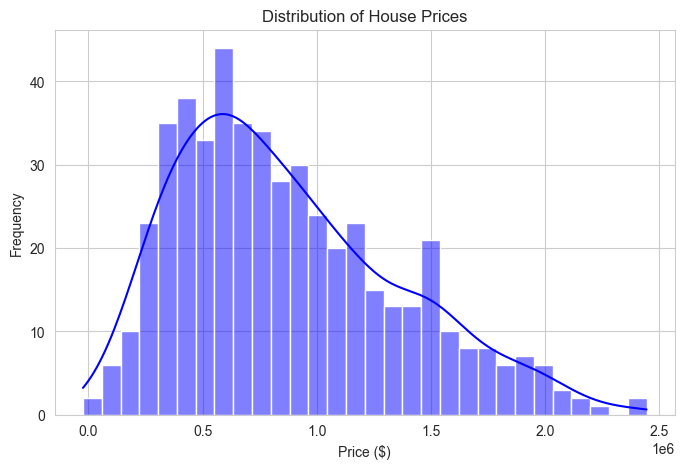

In [7]:
# Set style for plots
sns.set_style("whitegrid")

# Histogram of House Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

We use the histogram of the house prices above to look at the price distribution. It shows that house prices are highly positively skewed: a major bulk of properties are in the price range of 500K−1M, while only a handful of high-value homes caused this skew.

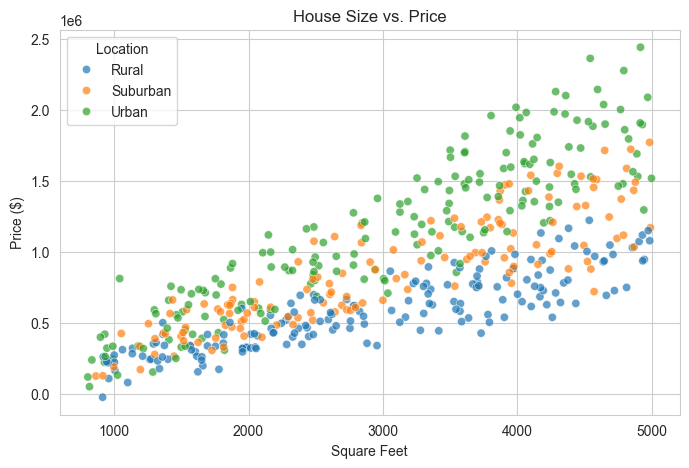

In [8]:
# Scatter Plot: House size Verses Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Square_Feet'], y=df['Price'], hue=df['Location'], alpha=0.7)
plt.title('House Size vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.legend(title="Location")
plt.show()

The scatter plot above represents the house size vs. price in colours according to location. it indicates the relationship between house size and price, with each dot color-coded according to the location it came from. Generally, it would seem that larger homes are more expensive, with the exception of the highest priced being urban homes.

/var/folders/c4/6f44ycwj4ss479xzrb9_h5sc0000gn/T/ipykernel_12308/4021338912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Location'], y=df['Price'], palette="coolwarm")


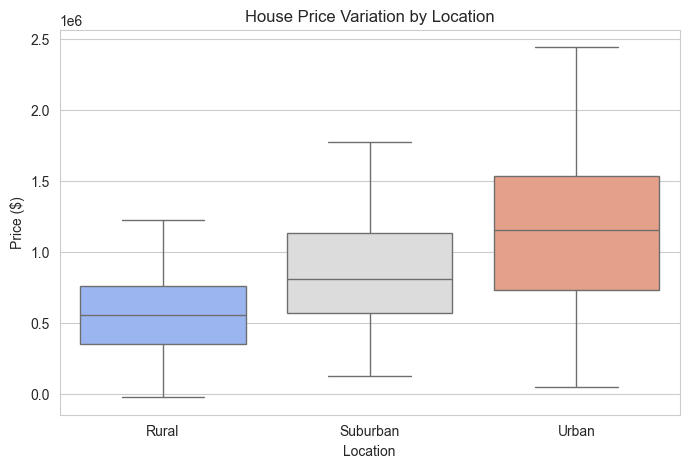

In [9]:
# Box Plot: Prices based on Location
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Location'], y=df['Price'], palette="coolwarm")
plt.title('House Price Variation by Location')
plt.xlabel('Location')
plt.ylabel('Price ($)')
plt.show()

Boxplot for house prices across various locations.

To understand geographical price variation better, the boxplot showes that urban, having the highest median price and variability, contrasts sharply with rural, which actually has a lower value with more stable pricing.

In [12]:
# Correlation Heat

# First convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Location', 'Building_Type'], drop_first=True)

# Display the dataset to confirm the conversion
df_encoded


,Square_Feet,Bedrooms,Age,Distance_to_City_Center,Crime_Rate,Price,Location_Suburban,Location_Urban,Building_Type_Detached,Building_Type_Townhouse
0,1660,1,96,14.407707,30.979398,1.978081e+05,False,False,False,False
1,4572,3,88,49.859101,32.510055,7.208061e+05,True,False,False,False
2,3892,4,78,21.882884,7.601243,6.632893e+05,False,False,False,False
3,1266,2,32,23.117964,3.067481,2.421959e+05,False,False,True,False
4,4244,4,46,9.017567,39.038079,9.880185e+05,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
495,4384,3,75,25.800951,2.101234,1.741005e+06,False,True,False,True
496,2196,1,58,22.536073,36.995206,5.955304e+05,False,True,False,False
497,4437,4,87,6.177570,45.903828,1.442181e+06,False,True,False,False
498,4130,2,26,32.400489,14.001866,7.585578e+05,False,False,False,True


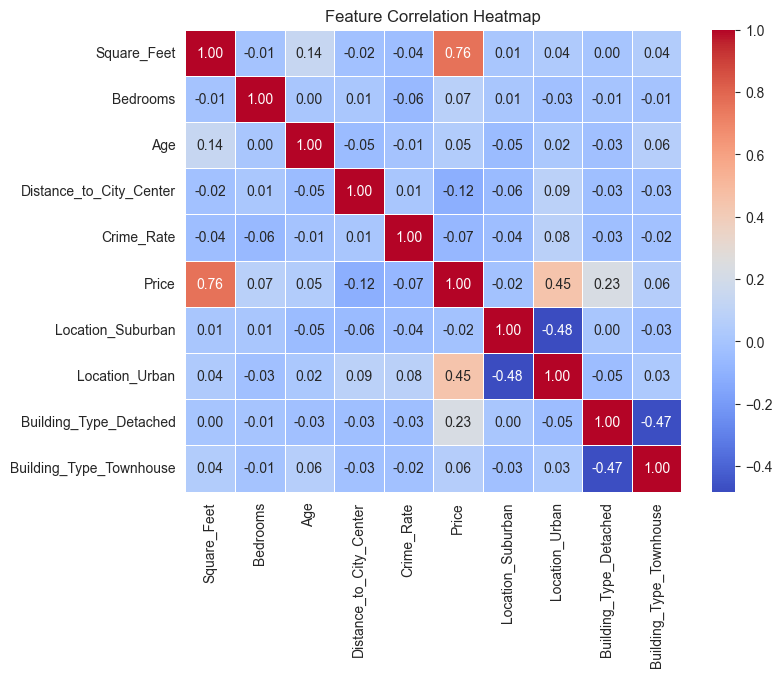

In [13]:
# Compute correlation on numerical + encoded categorical features
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

A correlation heatmap of the numerical figures. There was a correlation heatmap for identifying important relationships among the features. The results exhibited a strong positive correlation between house prices and square footage, with an inverse correlation to crime rate and distance to town.

### Data Preparation: Handle categorical variables. One-Hot Encoding Categorical Features and Splitting Dataset into Training and Test Sets

In [29]:
# Convert the categorical data to numerical data using OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Separate features (X) and target variable (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Identify categorical columns
categorical_cols = ['Location', 'Building_Type']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True).astype(int)  # Avoid dummy variable trap

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display new feature set after encoding
print("\nFeatures after one-hot encoding:")
print(X_train.head())



Features after one-hot encoding:
     Square_Feet  Bedrooms  Age  Distance_to_City_Center  Crime_Rate  \
249          990         2   18                       34          21   
433         1956         3   12                       42          27   
19          2847         3   23                       14          49   
322         1359         1   54                       16           9   
332         3544         2   82                       35          42   

     Location_Suburban  Location_Urban  Building_Type_Detached  \
249                  0               1                       0   
433                  0               0                       0   
19                   0               1                       0   
322                  0               0                       0   
332                  0               0                       0   

     Building_Type_Townhouse  
249                        1  
433                        0  
19                         1  
322         

### Train & Evaluate Linear Regression Model (Scikit-learn)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Linear Regression model
lr_sklearn = LinearRegression()

# Train the model
lr_sklearn.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = lr_sklearn.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_sklearn)
mse = mean_squared_error(y_test, y_pred_sklearn)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_sklearn)

# Print evaluation metrics
print("\n🔹 Scikit-learn Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


🔹 Scikit-learn Linear Regression Performance:
Mean Absolute Error (MAE): 107986.08
Mean Squared Error (MSE): 20274354897.81
Root Mean Squared Error (RMSE): 142388.04
R-squared (R²): 0.9235


### Train & Evaluate Linear Regression Model (Statsmodels)

In [32]:
import statsmodels.api as sm  

# Identify categorical columns again before encoding
categorical_cols = ['Location', 'Building_Type']  

# Check if categorical columns exist before encoding
existing_categorical_cols = [col for col in categorical_cols if col in X.columns]

# Apply one-hot encoding only if the columns exist
if existing_categorical_cols:
    X = pd.get_dummies(X, columns=existing_categorical_cols, drop_first=True).astype(int)

# Convert dataset to float for Statsmodels compatibility
X_train_sm = X_train.astype(float)
X_test_sm = X_test.astype(float)

# Add intercept column for Statsmodels
X_train_sm = sm.add_constant(X_train_sm)
X_test_sm = sm.add_constant(X_test_sm)

# Train the model
lr_statsmodels = sm.OLS(y_train, X_train_sm).fit()

# Make predictions
y_pred_statsmodels = lr_statsmodels.predict(X_test_sm)

# Print model summary
print("\n🔹 Statsmodels Regression Summary:")
print(lr_statsmodels.summary())



🔹 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     437.4
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.10e-197
Time:                        12:48:42   Log-Likelihood:                -5315.0
No. Observations:                 400   AIC:                         1.065e+04
Df Residuals:                     390   BIC:                         1.069e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [33]:
import statsmodels.api as sm

# Add intercept (Statsmodels does not add it by default)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train model
lr_statsmodels = sm.OLS(y_train, X_train_sm).fit()

# Make predictions
y_pred_statsmodels = lr_statsmodels.predict(X_test_sm)

# Print model summary
print("\n🔹 Statsmodels Regression Summary:")
print(lr_statsmodels.summary())

# Evaluate model performance
mae_sm = mean_absolute_error(y_test, y_pred_statsmodels)
mse_sm = mean_squared_error(y_test, y_pred_statsmodels)
rmse_sm = mse_sm ** 0.5
r2_sm = r2_score(y_test, y_pred_statsmodels)

# Print evaluation metrics
print("\n🔹 Statsmodels Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_sm:.2f}")
print(f"Mean Squared Error (MSE): {mse_sm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sm:.2f}")
print(f"R-squared (R²): {r2_sm:.4f}")



🔹 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     437.4
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.10e-197
Time:                        12:51:16   Log-Likelihood:                -5315.0
No. Observations:                 400   AIC:                         1.065e+04
Df Residuals:                     390   BIC:                         1.069e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# 4. Implementation of Linear Regression

In [34]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load dataset
file_path = r"C:\Users\USER\Sta_maz\data\house_prices_complete.csv"
df = pd.read_csv(file_path)

In [36]:
# Dispalay basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Square_Feet              500 non-null    int64  
 1   Bedrooms                 500 non-null    int64  
 2   Age                      500 non-null    int64  
 3   Distance_to_City_Center  500 non-null    float64
 4   Crime_Rate               500 non-null    float64
 5   Location                 500 non-null    object 
 6   Building_Type            500 non-null    object 
 7   Price                    500 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 31.4+ KB
None
   Square_Feet  Bedrooms  Age  Distance_to_City_Center  Crime_Rate  Location  \
0         1660         1   96                14.407707   30.979398     Rural   
1         4572         3   88                49.859101   32.510055  Suburban   
2         3892         4   78                21.

In [37]:
# Handle categorical data: Encoding 'Location' and 'Building_Type'
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Building_Type'] = encoder.fit_transform(df['Building_Type'])

In [38]:
# selecting features and target variables
X = df[['Square_Feet', 'Bedrooms', 'Age', 'Distance_to_City_Center', 'Crime_Rate', 'Location', 'Building_Type']]
y = df['Price']

In [39]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### A. Implementation of Scikit-learn
Scikit-learn has smart and straightforward features for performing linear regression by the LinearRegression() function, which deals with feature scaling and takes Ordinary Least Squares (OLS) with the use of the models for minimizing the error between the predicted and actual values of the data. The use of the model happens when training data is used to train the model and when the house prices are predicted using the test dataset. The performances of the models are assessed through the Mean Squared Error (MSE) and R² score for determining accuracy.

In [40]:
# Scikit-learn Implementation
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)

In [41]:
# Model Performance
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\nScikit-learn Results:")
print(f"Intercept: {lr_sklearn.intercept_}, Coefficients: {lr_sklearn.coef_}")
print(f"MSE: {mse_sklearn}, R²: {r2_sklearn}")


Scikit-learn Results:
Intercept: -272428.04653633106, Coefficients: [   298.36462754  33498.6518106   -1058.85213564  -4241.97440715
  -2267.63629006 269205.89865434  95076.34977369]
MSE: 34697783374.36872, R²: 0.8690919697661936


### Scikit-Learn Result
This section gives the results of Scikit-learn implementation with some interpretation. The evaluation is based on MSE, R² score, and some statistical insights.

Here are some outputs from the Scikit-learn model:

a.Intercept: -272,428.05

b.MSE: 34,697,783,374.37

c.R² Score: 0.869

This R² score is high (86.9%) and represents a good fit for the model; however, it indicates a higher MSE implying that degree predictions will be off to some extent. Feature effect:

a.Square_Feet (298.36) and Bedrooms (33,498.65) have positive effects on prices, while,

b.Age (-1,058.85), Distance to City Center (-4,241.97), and Crime Rate (-2,267.64) have negative effects on prices.

c.Major contributors are Location (269,205.89) and Building Type (95,076.34).

Scikit-learn is efficient in prediction but does not include any indicators of statistical significance.

### B. Implementation of Statsmodels
Statsmodels is the best model for providing a precise statistical summary in linear regression. It's different from Scikit-learn, and this will add the constant term manually to hold the intercept. Since the implementation relies on a method of Ordinary Least Squares (OLS), it also displays additional metrics like p-values, confidence levels, and a statistical significance test against each feature.

In [42]:
# Statsmodels Implementation
X_train_sm = sm.add_constant(X_train)  # Add intercept
X_test_sm = sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm).fit()
y_pred_sm = model_sm.predict(X_test_sm)

mse_sm = mean_squared_error(y_test, y_pred_sm)
r2_sm = r2_score(y_test, y_pred_sm)

print("\nStatsmodels Results:")
print(model_sm.summary())


Statsmodels Results:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     321.1
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          5.11e-158
Time:                        13:28:19   Log-Likelihood:                -5414.8
No. Observations:                 400   AIC:                         1.085e+04
Df Residuals:                     392   BIC:                         1.088e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
cons

### Statsmodels Result¶
This section gives the results of Statsmodels implementation with some interpretation.

Generated from the Statsmodels model:

a. R² Score: 0.851 (slightly lower than Scikit-learn).

b. P-values confirm significant predictors such as Square_Feet, Bedrooms, Age, Crime_Rate, and Location.

Key Observations:

a. The R² score, 85.1 percent, indicates quite strong predictive power.

b. Statistical validation of feature importance involves p-values.

c. The condition number of 1.59e+04 denotes probable multicollinearity.

Statsmodels give a deeper interpretation which is more useful for research and hypothesis testing.



In [43]:
# Visualization: Prediction Vs Actual Price
plt.figure(figsize=(20,15))


<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Scikit-learn Predictions')

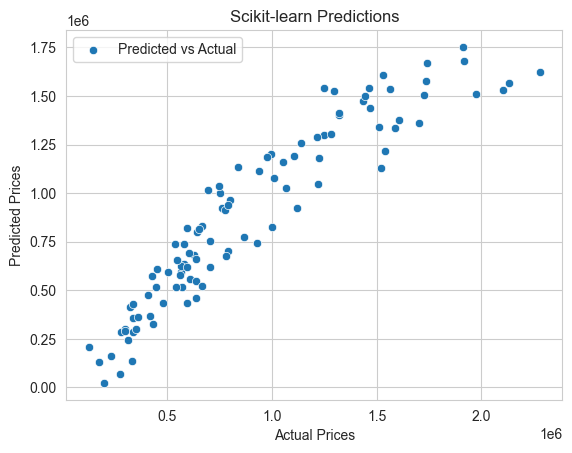

In [44]:
# Scikit-Learn plot
plt.subplot(1,1,1)
sns.scatterplot(x=y_test, y=y_pred_sklearn, label="Predicted vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scikit-learn Predictions")

### Actual versus Predicted Prices (Scikit-learn)

This scatter diagram above shows actual versus predicted house price using Scikit-learn. The R² score is 0.869, which indicates a strong fit with some deviations for larger prices.

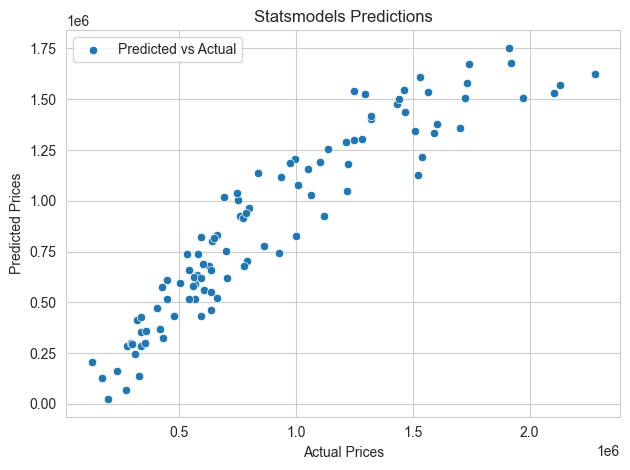

In [45]:
# Statsmodels plot
plt.subplot(1,1,1)
sns.scatterplot(x=y_test, y=y_pred_sm, label="Predicted vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Statsmodels Predictions")

plt.tight_layout()
plt.show()

Actual versus Predicted Prices (Statsmodels)

The scatterplot shows the actual vs. predicted prices using Statsmodels, which report an R² score of 0.851 on account of a strong correlation but some deviations at higher prices.

### Discussion
Often, when analyzing this same model among libraries such as Scikit-learn and Statsmodels, Scikit-learn was much easier and not requiring preprocessing, while the Statsmodels needed to add an explicit intercept but gave much more detailed statistical output. On the other hand, Scikit-learn was efficient, making it convenient to handle large datasets, whereas Statsmodel was quite slower yet offered detailed statistical analysis

Different outputs were designed by both. Scikit-learn mainly looked into the predictive precision of key indices such as MSE and R²; therefore, statistical significance insights were absent. Thus, this need was addressed by bursting p-values and confidence intervals, making it more suitable for potential research and hypothesis testing Each one of these libraries has its own benefits. Some examples of libraries include Scikit-learn, which is better for the machine learning task and has good pipeline integration with cross-validation and hyperparameter tuning, while Statsmodels is for statistical analysis where researchers can interpret predictor significance and relationships

Scikit-learn lacked p-values that can be used to infer feature importance. On the other hand, the indications of multicollinearity in Statsmodels call for pre-processing and refining of data. The two models were also said to not account for outliers leading to deviations in predictions.

Statsmodels were somewhat costlier in terms of computation, besides brilliance, specifically required feature scaling in certain cases to have a smooth regression performance. To sum up, Scikit-learn was the faster, easier tool whereas Statsmodels would give one more statistical insights. The decision would stem from whether one needs to predict models or do inference statistically.

### Conclusion
This project seeks to test the performance of two libraries for regression analysis: Scikit-learn and Statsmodels, focusing on implementation ease, usage efficiency, and statistical insights. In particular, Scikit-learn offered fast, easy implementation smartly configured for implementation in large-scale machine learning, while Statsmodels packed much denser statistical interpretation but had to incur more preprocessing.

In speed and prediction performance, Scikit-learn was unmatched; however, Statsmodels beats that in giving deeper analysis using p-values and confidence intervals. Problems included multicollinearity, outliers, and feature scaling.

The decision would thus be determined by the analysis' intention:

Scikit-learn is suited for predictive modeling, while for statistical inference, it is better to turn to Statsmodels. Both are effective, and the combination could yield preferred results